In [11]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt


from src import MetaInfo


In [3]:
train_data = pd.read_parquet("data/train.parquet")
test_data = pd.read_parquet("data/test.parquet")


In [4]:
train_data.dtypes

customer_id                int64
date_diff_post           float64
buy_post                   int64
group_name                object
revenue                  float64
startdatetime     datetime64[ns]
dish_name                 object
ownareaall_sqm           float64
format_name               object
dtype: object

In [5]:
train_data.describe()

,customer_id,date_diff_post,buy_post,revenue,startdatetime,ownareaall_sqm
count,1.212938e+07,9.660867e+06,1.212938e+07,1.212938e+07,12129384,1.212938e+07
mean,1.980954e+07,2.048039e+01,7.964846e-01,1.067995e+02,2023-02-20 12:19:13.394690048,2.155130e+02
min,2.989100e+04,0.000000e+00,0.000000e+00,1.000000e-02,2022-09-02 00:00:39,0.000000e+00
25%,1.010852e+07,8.000000e+00,1.000000e+00,4.499000e+01,2022-12-06 16:12:06,1.049000e+02
50%,2.127459e+07,1.700000e+01,1.000000e+00,7.998000e+01,2023-02-22 11:04:22,2.104000e+02
75%,2.803856e+07,3.000000e+01,1.000000e+00,1.317725e+02,2023-05-09 18:48:02,3.000000e+02
max,4.666180e+07,6.000000e+01,1.000000e+00,1.449971e+04,2023-08-01 23:57:46,9.787000e+02
std,1.138904e+07,1.527091e+01,4.026126e-01,1.074385e+02,NaN,1.225907e+02


In [8]:
# train_data[train_data['customer_id'] == 45067]

In [9]:
temp = train_data.groupby('ownareaall_sqm')['format_name'].nunique()

In [10]:
temp[temp == 5]

ownareaall_sqm
300.0    5
Name: format_name, dtype: int64

In [12]:
manager = MetaInfo(train_data)

In [152]:
new_features = manager.generate_meta_features()

In [153]:
new_features

,unique_places,orders_count,total_spend,avg_bill,unique_days
customer_id,,,,,
29891,2,25,5087.35,203.494000,19
30477,1,25,5675.60,227.024000,21
31426,1,24,9393.59,391.399583,20
44491,2,4,514.90,128.725000,3
44939,2,3,1664.83,554.943333,3
...,...,...,...,...,...
46624509,1,3,935.90,311.966667,2
46625265,1,3,1199.87,399.956667,1
46639170,1,3,1089.92,363.306667,1


In [154]:

labels = manager.get_labels()
labels

,date_diff_post,buy_post
customer_id,,
29891,9.0,1
30477,10.0,1
31426,4.0,1
44491,42.0,1
44939,9.0,1
...,...,...
46624509,NaN,0
46625265,NaN,0
46639170,10.0,1


In [126]:
difference_in_time = temp.diff()

In [131]:
# difference_in_time.groupby(difference_in_time).mean()
train_data['date_diff'] = train_data.groupby("customer_id")['startdatetime'].diff()

In [121]:
item[1].diff().mean()

Timedelta('0 days 14:10:27.576470588')

In [51]:
t = train_data.groupby('dish_name')['revenue'].median()

In [52]:
t2 = train_data['revenue'] - train_data['dish_name'].map(t)

<AxesSubplot:>

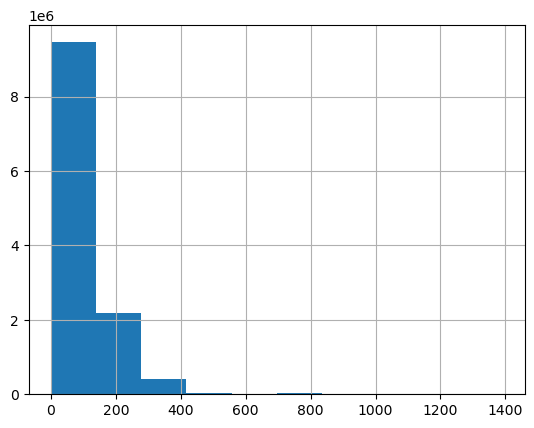

In [55]:
train_data['dish_name'].map(t).hist()